In [1]:
from fuzzy_system.fuzzy_variable_output import FuzzyOutputVariable
from fuzzy_system.fuzzy_variable_input import FuzzyInputVariable
# from fuzzy_system.fuzzy_variable import FuzzyVariable
from fuzzy_system.fuzzy_system import FuzzySystem
from pprint import pprint
import pandas as pd
import numpy as np

In [2]:
def npToDf(data, col=None):
    if col is None:
        col = [str(i) for i in range(data.shape[0])]
    
    return pd.DataFrame(
        data, 
        columns = col
    )

def create1(t=""):
    inp1 = FuzzyInputVariable('Neurotocism', 45, 51, 100)
    inp1.addTriangular('SB1', 43, 45, 47
        ).addTriangular('SB2', 45, 47, 49
        ).addTriangular('SB3', 47, 49, 51
        ).addTriangular('SB4', 49, 51, 51)

    inp2 = FuzzyInputVariable('Extroversion', 40, 50, 100)
    inp2.addTriangular('SD1', 38, 40, 43.25
        ).addTriangular('SD2', 40, 43.25, 46.75
        ).addTriangular('SD3', 43.25, 46.75, 50
        ).addTriangular('SD4', 46.75, 50, 50)

    out1 = FuzzyOutputVariable('Anxiety', 0, 60, 100)
    out1.addTriangular('L', 0, 0, 20
        ).addTriangular('M', 0, 20, 40
        ).addTriangular('H', 20, 40, 60
        ).addTriangular('E', 40, 60, 60)

    system = FuzzySystem()
    system.add_input_variable(inp1)
    system.add_input_variable(inp2)
    system.add_output_variable(out1)
    
    # if neurot is sb1 and extro is sd3 then d1, dst..
    system.add_rule({'Neurotocism':'SB1','Extroversion':'SD3'},{'Anxiety':'M'})
    system.add_rule({'Neurotocism':'SB1','Extroversion':'SD3'},{'Anxiety':'H'})
    system.add_rule({'Neurotocism':'SB1','Extroversion':'SD4'},{'Anxiety':'M'})
    system.add_rule({'Neurotocism':'SB1','Extroversion':'SD4'},{'Anxiety':'H'})
    system.add_rule({'Neurotocism':'SB2','Extroversion':'SD1'},{'Anxiety':'L'})
    system.add_rule({'Neurotocism':'SB2','Extroversion':'SD1'},{'Anxiety':'M'})
    system.add_rule({'Neurotocism':'SB2','Extroversion':'SD2'},{'Anxiety':'L'})
    system.add_rule({'Neurotocism':'SB2','Extroversion':'SD2'},{'Anxiety':'M'})
    system.add_rule({'Neurotocism':'SB2','Extroversion':'SD2'},{'Anxiety':'H'})
    system.add_rule({'Neurotocism':'SB2','Extroversion':'SD3'},{'Anxiety':'L'})
    system.add_rule({'Neurotocism':'SB2','Extroversion':'SD3'},{'Anxiety':'M'})
    system.add_rule({'Neurotocism':'SB2','Extroversion':'SD3'},{'Anxiety':'H'})
    system.add_rule({'Neurotocism':'SB2','Extroversion':'SD4'},{'Anxiety':'L'})
    system.add_rule({'Neurotocism':'SB2','Extroversion':'SD4'},{'Anxiety':'M'})
    system.add_rule({'Neurotocism':'SB2','Extroversion':'SD4'},{'Anxiety':'H'})
    system.add_rule({'Neurotocism':'SB3','Extroversion':'SD1'},{'Anxiety':'L'})
    system.add_rule({'Neurotocism':'SB3','Extroversion':'SD1'},{'Anxiety':'M'})
    system.add_rule({'Neurotocism':'SB3','Extroversion':'SD2'},{'Anxiety':'L'})
    system.add_rule({'Neurotocism':'SB3','Extroversion':'SD2'},{'Anxiety':'H'})
    system.add_rule({'Neurotocism':'SB3','Extroversion':'SD3'},{'Anxiety':'L'})
    system.add_rule({'Neurotocism':'SB3','Extroversion':'SD3'},{'Anxiety':'M'})
    system.add_rule({'Neurotocism':'SB3','Extroversion':'SD3'},{'Anxiety':'H'})
    system.add_rule({'Neurotocism':'SB3','Extroversion':'SD3'},{'Anxiety':'E'})
    system.add_rule({'Neurotocism':'SB3','Extroversion':'SD4'},{'Anxiety':'L'})
    system.add_rule({'Neurotocism':'SB3','Extroversion':'SD4'},{'Anxiety':'M'})
    system.add_rule({'Neurotocism':'SB3','Extroversion':'SD4'},{'Anxiety':'H'})
    system.add_rule({'Neurotocism':'SB3','Extroversion':'SD4'},{'Anxiety':'E'})
    system.add_rule({'Neurotocism':'SB4','Extroversion':'SD2'},{'Anxiety':'M'})
    system.add_rule({'Neurotocism':'SB4','Extroversion':'SD2'},{'Anxiety':'H'})
    system.add_rule({'Neurotocism':'SB4','Extroversion':'SD3'},{'Anxiety':'L'})
    system.add_rule({'Neurotocism':'SB4','Extroversion':'SD3'},{'Anxiety':'M'})
    system.add_rule({'Neurotocism':'SB4','Extroversion':'SD3'},{'Anxiety':'H'})
    system.add_rule({'Neurotocism':'SB4','Extroversion':'SD3'},{'Anxiety':'E'})
    system.add_rule({'Neurotocism':'SB4','Extroversion':'SD4'},{'Anxiety':'L'})
    system.add_rule({'Neurotocism':'SB4','Extroversion':'SD4'},{'Anxiety':'M'})
    system.add_rule({'Neurotocism':'SB4','Extroversion':'SD4'},{'Anxiety':'H'})
    system.add_rule({'Neurotocism':'SB4','Extroversion':'SD4'},{'Anxiety':'E'})
    
    return system

# konversi raw neurotocism ke standard score
def createNeurot(t=""):
    inp1 = FuzzyInputVariable('Raw', 0, 40, 100)
    inp1.addTriangular('A1', -10, 0, 10
        ).addTriangular('A2', 0, 10, 20
        ).addTriangular('A3', 10, 20, 30
        ).addTriangular('A4', 20, 30, 40
        ).addTriangular('A5', 30, 40, 50)

    out1 = FuzzyOutputVariable('Score', 30, 65, 100)
    out1.addTriangular('B1', 18, 30, 42
        ).addTriangular('B2', 30, 42, 53
        ).addTriangular('B3', 42, 53, 65
        ).addTriangular('B4', 53, 65, 77)
    
    system = FuzzySystem()
    system.add_input_variable(inp1)
    system.add_output_variable(out1)
    
    # if a1 then b1, dst..
    system.add_rule({'Raw':'A1'},{'Score':'B1'})
    system.add_rule({'Raw':'A1'},{'Score':'B2'})
    system.add_rule({'Raw':'A1'},{'Score':'B3'})
    system.add_rule({'Raw':'A1'},{'Score':'B4'})
    system.add_rule({'Raw':'A2'},{'Score':'B1'})
    system.add_rule({'Raw':'A2'},{'Score':'B2'})
    system.add_rule({'Raw':'A2'},{'Score':'B3'})
    system.add_rule({'Raw':'A2'},{'Score':'B4'})
    system.add_rule({'Raw':'A3'},{'Score':'B1'})
    system.add_rule({'Raw':'A3'},{'Score':'B2'})
    system.add_rule({'Raw':'A3'},{'Score':'B3'})
    system.add_rule({'Raw':'A3'},{'Score':'B4'})
    system.add_rule({'Raw':'A4'},{'Score':'B2'})
    system.add_rule({'Raw':'A4'},{'Score':'B3'})
    system.add_rule({'Raw':'A4'},{'Score':'B4'})
    system.add_rule({'Raw':'A5'},{'Score':'B3'})
    system.add_rule({'Raw':'A5'},{'Score':'B4'})
    
    return system

# konversi raw extroversion ke standard score
def createExtrov(t=""):
    inp1 = FuzzyInputVariable('Raw', 10, 40, 100)
    inp1.addTriangular('C1', 2, 10, 18
        ).addTriangular('C2', 10, 18, 25
        ).addTriangular('C3', 18, 25, 32
        ).addTriangular('C4', 25, 32, 40
        ).addTriangular('C5', 32, 40, 48)

    out1 = FuzzyOutputVariable('Score', 30, 65, 100)
    out1.addTriangular('D1', 18, 30, 42
        ).addTriangular('D2', 30, 42, 53
        ).addTriangular('D3', 42, 53, 65
        ).addTriangular('D4', 53, 65, 77)
    
    system = FuzzySystem()
    system.add_input_variable(inp1)
    system.add_output_variable(out1)
    
    # if c1 then d1, dst..
    system.add_rule({'Raw':'C1'},{'Score':'D1'})
    system.add_rule({'Raw':'C1'},{'Score':'D2'})
    system.add_rule({'Raw':'C2'},{'Score':'D1'})
    system.add_rule({'Raw':'C2'},{'Score':'D2'})
    system.add_rule({'Raw':'C2'},{'Score':'D3'})
    system.add_rule({'Raw':'C3'},{'Score':'D2'})
    system.add_rule({'Raw':'C3'},{'Score':'D3'})
    system.add_rule({'Raw':'C4'},{'Score':'D2'})
    system.add_rule({'Raw':'C4'},{'Score':'D3'})
    system.add_rule({'Raw':'C4'},{'Score':'D4'})
    system.add_rule({'Raw':'C5'},{'Score':'D3'})
    system.add_rule({'Raw':'C5'},{'Score':'D4'})
    
    return system

system = create1()
Nsystem = createNeurot()
Esystem = createExtrov()

Neurot
{'Score': 49.62108405962548}
Extro
{'Score': 47.10470719054608}
Neurotocism: raw to standard


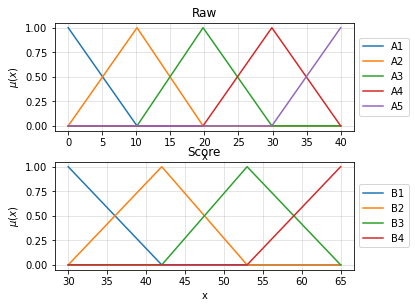

Extroversion: raw to standard


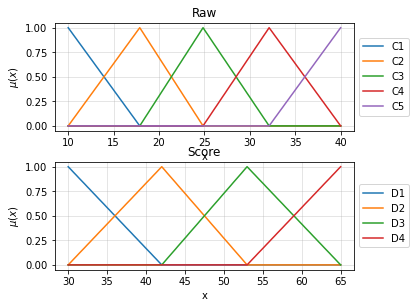

Anxiety


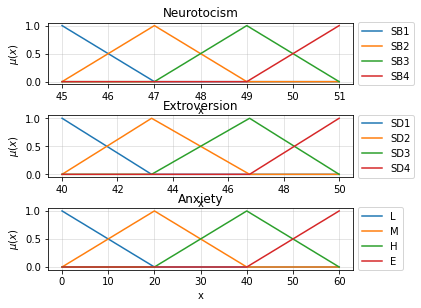

In [3]:
# output = system.evaluate_output({
# 	'Neurotocism':46.36,
# 	'Extroversion':46.36
# })
#     pprint(info.__str__().split("+"))
# print('fuzzification\n-------------\n', info['fuzzification'])
# print('rules\n-----\n', info['rules'])

def inferN(p1 = 50):
    return Nsystem.evaluate_output_info({
        'Raw': p1,
    })

def inferE(p1 = 50):
    return Esystem.evaluate_output_info({
        'Raw': p1,
    })


def inferMain(p1 = 50, p2 = 50):
    return system.evaluate_output_info({
        'Neurotocism': p1,
        'Extroversion': p2
    })

def inferFull(nraw=1, eraw=1):
    no, ninf = inferN(nraw)
    eo, einf = inferE(eraw)
    
    return inferMain(no['Score'], eo['Score'])

print("Neurot")
o, inf = inferN(30)
print(o)

print("Extro")
o, inf = inferE(23)
print(o)

#     system.plot_system()
print("Neurotocism: raw to standard")
Nsystem.plot_system()

print("Extroversion: raw to standard")
Esystem.plot_system()

print("Anxiety")
system.plot_system()


# for i in range(0,100,10):
#     for j in range(0,100,10):

def testMain():
    outArr = []
    for i in np.arange(45,51,0.5):
        for j in np.arange(40,50,0.5):
            o, inf = inferMain(i, j)
            outArr.append([i,j, o['Anxiety'], inf])

    return npToDf(np.array(outArr), ["Neurotocism","Extroversion","Anxiety","inf"])

def testFull(data1, data2, usezip=False):
    """
    test with raw
    """
    outArr = []
    
    if usezip:
        for i,j in zip(data1, data2):
            o, inf = inferFull(i, j)
            outArr.append([i,j,o['Anxiety'], inf])
        return npToDf(np.array(outArr), ["Neurotocism","Extroversion","Anxiety","inf"])
    
    for i in data1:
        for j in data2:
            o, inf = inferFull(i, j)
            outArr.append([i,j,o['Anxiety'], inf])
    
    return npToDf(np.array(outArr), ["Neurotocism","Extroversion","Anxiety","inf"])
        
# dfResult = testMain()
dfResult = testFull(np.arange(45,51,0.5), np.arange(45,51,0.5))

In [4]:
# pd.set_option('display.max_rows', 30)
pd.set_option('display.max_rows', None)
dfResult

,Neurotocism,Extroversion,Anxiety,inf
0,45.0,45.0,30.0,0.697/0.0 + 0.697/0.6060606060606061 + 0.697/1...
1,45.0,45.5,30.0,0.697/0.0 + 0.697/0.6060606060606061 + 0.697/1...
2,45.0,46.0,30.0,0.697/0.0 + 0.697/0.6060606060606061 + 0.697/1...
3,45.0,46.5,30.0,0.697/0.0 + 0.697/0.6060606060606061 + 0.697/1...
4,45.0,47.0,30.0,0.697/0.0 + 0.697/0.6060606060606061 + 0.697/1...
5,45.0,47.5,30.0,0.697/0.0 + 0.697/0.6060606060606061 + 0.697/1...
6,45.0,48.0,30.0,0.697/0.0 + 0.697/0.6060606060606061 + 0.697/1...
7,45.0,48.5,30.0,0.697/0.0 + 0.697/0.6060606060606061 + 0.697/1...
8,45.0,49.0,30.0,0.697/0.0 + 0.697/0.6060606060606061 + 0.697/1...
9,45.0,49.5,30.0,0.697/0.0 + 0.697/0.6060606060606061 + 0.697/1...


In [5]:
# dfResult.drop("inf", axis="columns").describe()
dfResult.describe()

,Neurotocism,Extroversion,Anxiety,inf
count,144.0,144.0,144.0,144
unique,12.0,12.0,1.0,144
top,45.0,45.0,30.0,0.697/0.0 + 0.697/0.6060606060606061 + 0.697/1...
freq,12.0,12.0,144.0,1


In [7]:
df = pd.read_csv("ne-raw.csv")
df

,no,nraw,nmpi,eraw,empi,scat_anxiety
0,1,30,57,23,42,32
1,2,10,37,32,57,5
2,3,4,31,16,31,18
3,4,8,35,36,63,10
4,5,15,42,24,44,15
5,6,15,42,22,41,23
6,7,19,46,32,57,14
7,8,10,37,30,53,13
8,9,31,58,26,47,50
9,10,29,56,30,53,12


In [6]:
dfResultRef = testFull(df['nraw'].values, df['eraw'].values, usezip=True)
dfResultRef

,Neurotocism,Extroversion,Anxiety,inf
0,30,23,30.0,0.697/0.0 + 0.697/0.6060606060606061 + 0.697/1...
1,10,32,29.768751,0.758/0.0 + 0.758/0.6060606060606061 + 0.758/1...
2,4,16,29.768751,0.758/0.0 + 0.758/0.6060606060606061 + 0.758/1...
3,8,36,29.768751,0.758/0.0 + 0.758/0.6060606060606061 + 0.758/1...
4,15,24,29.768751,0.758/0.0 + 0.758/0.6060606060606061 + 0.758/1...
5,15,22,29.768751,0.758/0.0 + 0.758/0.6060606060606061 + 0.758/1...
6,19,32,29.768751,0.758/0.0 + 0.758/0.6060606060606061 + 0.758/1...
7,10,30,29.768751,0.758/0.0 + 0.758/0.6060606060606061 + 0.758/1...
8,31,26,29.768751,0.758/0.0 + 0.758/0.6060606060606061 + 0.758/1...
9,29,30,29.768751,0.758/0.0 + 0.758/0.6060606060606061 + 0.758/1...


In [12]:
pd.DataFrame({
'scat_anxiety' : df['scat_anxiety'].values,
'model anxiety': dfResultRef['Anxiety'].values
})

,scat_anxiety,model anxiety
0,32,30.0
1,5,29.768751
2,18,29.768751
3,10,29.768751
4,15,29.768751
5,23,29.768751
6,14,29.768751
7,13,29.768751
8,50,29.768751
9,12,29.768751


In [14]:
def mape(actual, forecast):
    # https://www.forecastpro.com/2020/08/24/how-do-i-measure-forecast-accuracy/
    # MAPE (Mean Absolute Percent Error)
    # 1/n sum((actual-forecast)/actual) * 100
    scor = (1/len(actual) * sum((actual-forecast)/actual)) * 100
    return abs(scor)

def mapeAccuracy(testy, testpredict):
    return 100-abs(mape(testy, testpredict))

mape(df['scat_anxiety'], dfResultRef['Anxiety'].values)
# mapeAccuracy(df['scat_anxiety'], dfResultRef['Anxiety'].values)
# mape(np.array([1,2,3]),np.array([2,2,3]))
# testy, testpredict

183.68928180563327